Pair programming Regresión Logística Random Forest - 6

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. Los objetivos de este pair programming :
- Ajustad un modelo de Random Forest a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [2]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

#  Ajuste del modelo variables estandarizadas 

In [3]:
df_esta = pd.read_csv("/content/diabetes_estand.csv", index_col = 0)
df_esta.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.560400
1,0,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.159340
2,1,1.290326,2.016662,-0.735818,-1.302720,-0.784632,-1.389077,-0.068827
3,0,-0.851320,-1.073567,-0.556276,0.163338,0.426735,-0.639824,-1.064466
4,1,-1.157270,0.504422,-2.890320,0.928238,1.380365,1.701591,0.021685


In [72]:
# separamos los datos en X e y

X1 = df_esta.drop('Outcome', axis = 1)
y1 = df_esta['Outcome']

In [73]:
# dividimos nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [93]:
# definimos un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [ 6, 7, 8], # teníamos overfitting => reducimos la profundidad del modelo, la nuestra anterior era de 16. 
        "max_features": [1,2,3],# Ponemos como límite el 3 ya que es el resultado de la raiz cuadrada. 
        "min_samples_split": [30, 50, 70],
        "min_samples_leaf": [30, 50, 70]} 

In [94]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla
        

In [95]:
# ajustamos el modelo que acabamos de definir en el GridSearch
# 🚨 Esta celda puede tardar en ejecutarse

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [30, 50, 70],
                         'min_samples_split': [30, 50, 70]},
             verbose=-1)

In [96]:
# saquemos ahora cual es nuestro mejor bosque
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=30,
                       min_samples_split=30, random_state=42)

  0%|          | 0/100 [00:00<?, ?it/s]

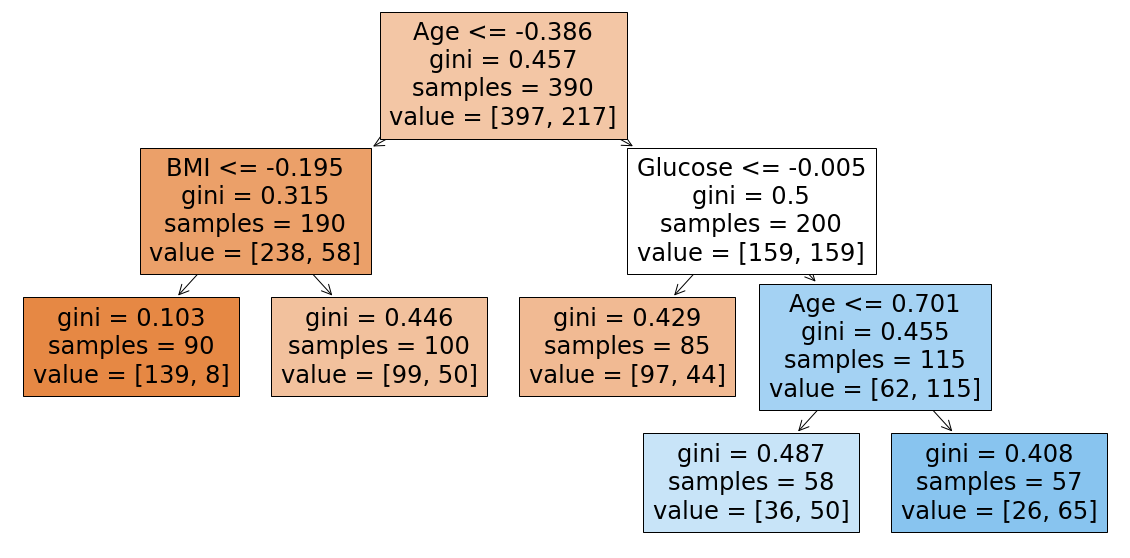

  1%|          | 1/100 [00:00<00:38,  2.54it/s]

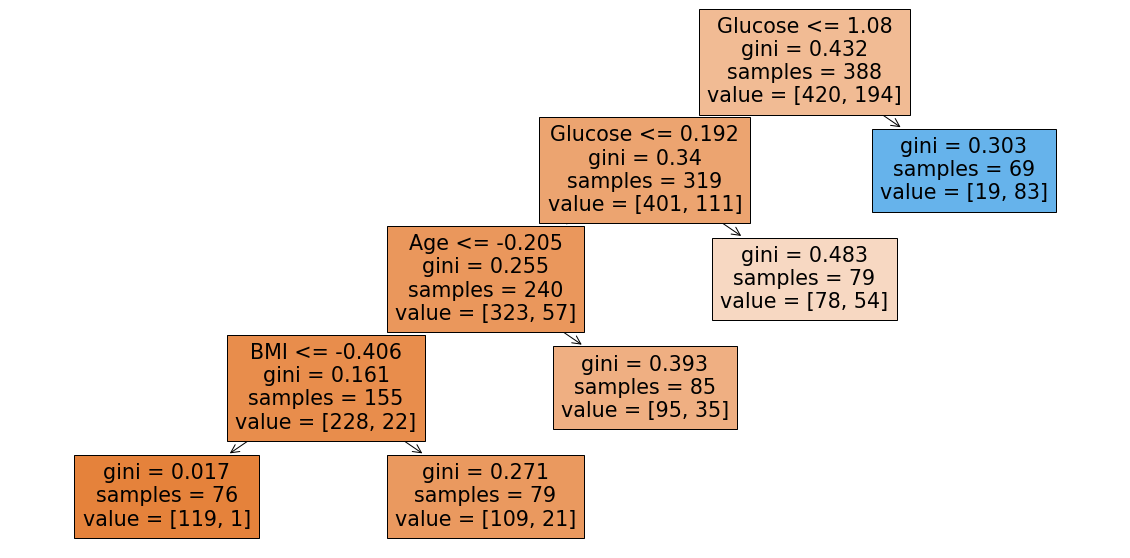

  2%|▏         | 2/100 [00:00<00:38,  2.52it/s]

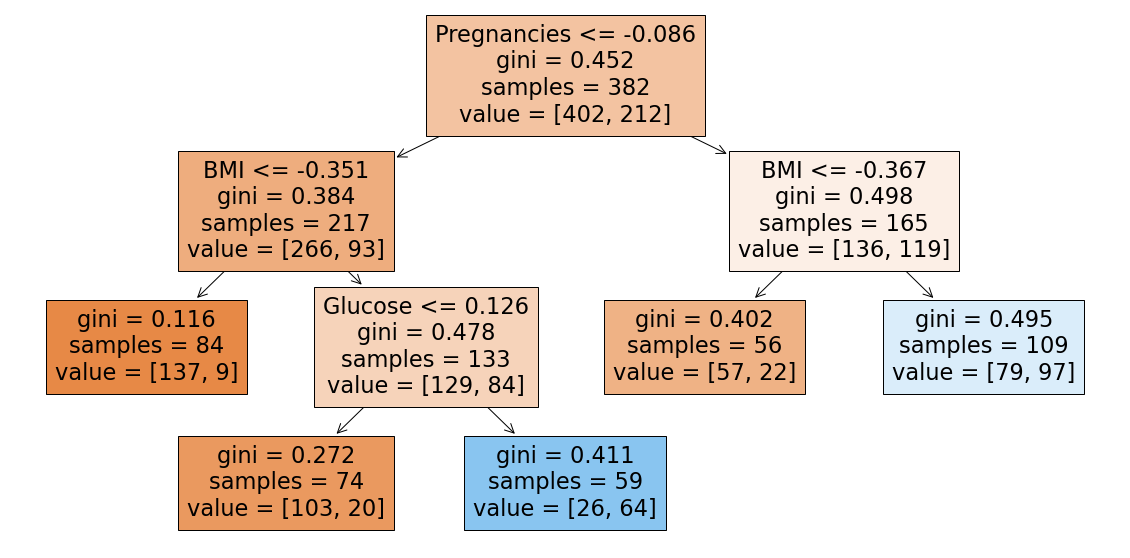

  3%|▎         | 3/100 [00:01<00:38,  2.52it/s]

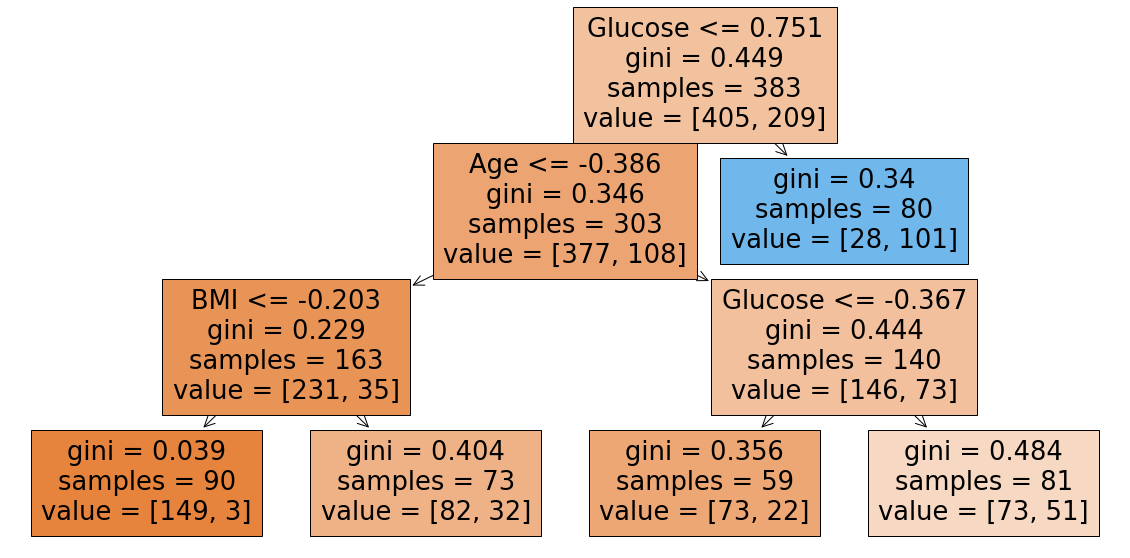

  4%|▍         | 4/100 [00:01<00:38,  2.53it/s]

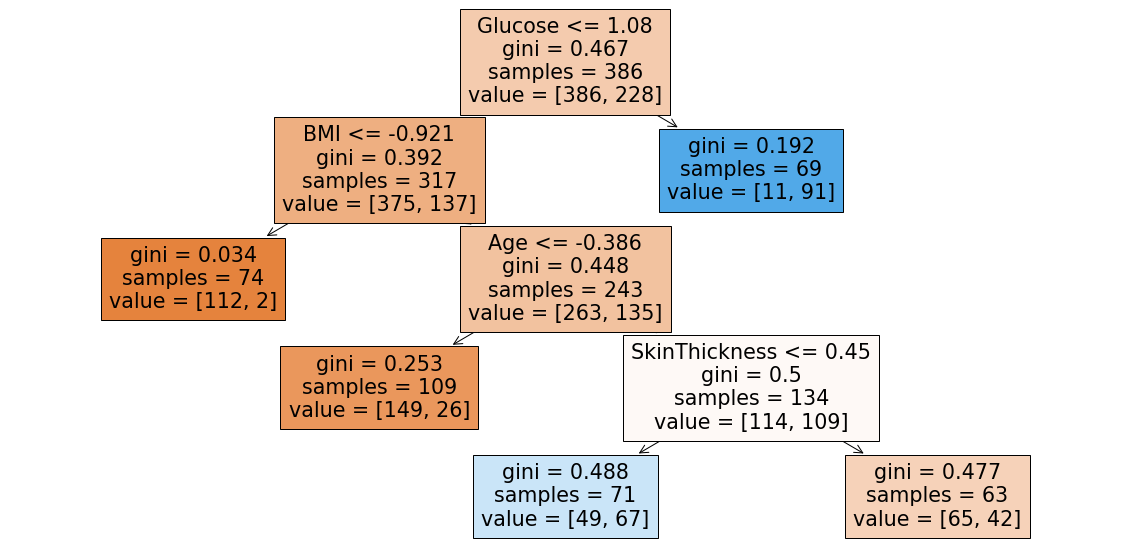

  5%|▌         | 5/100 [00:01<00:36,  2.57it/s]

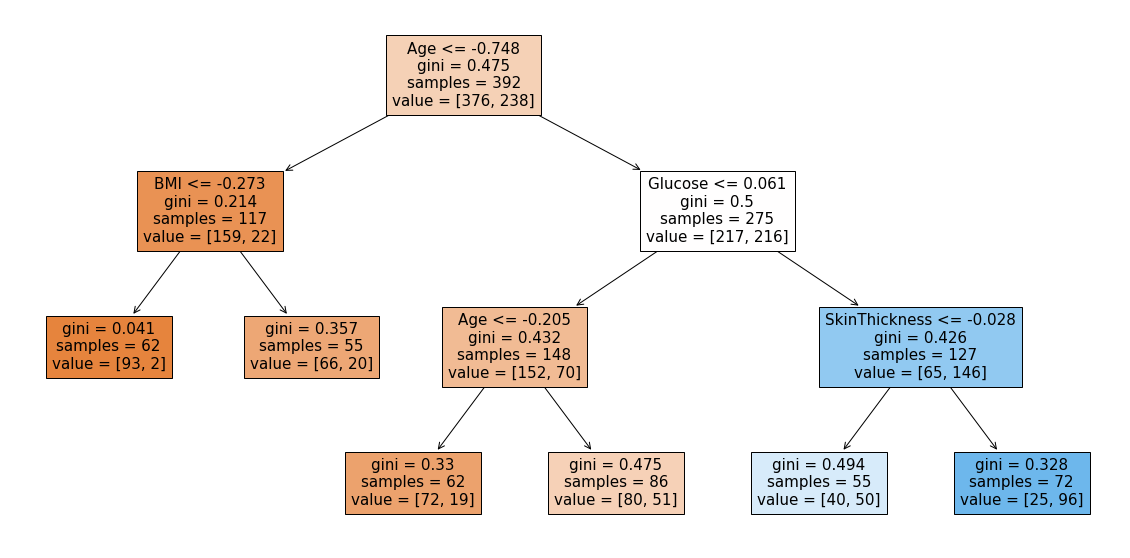

  6%|▌         | 6/100 [00:02<00:38,  2.47it/s]

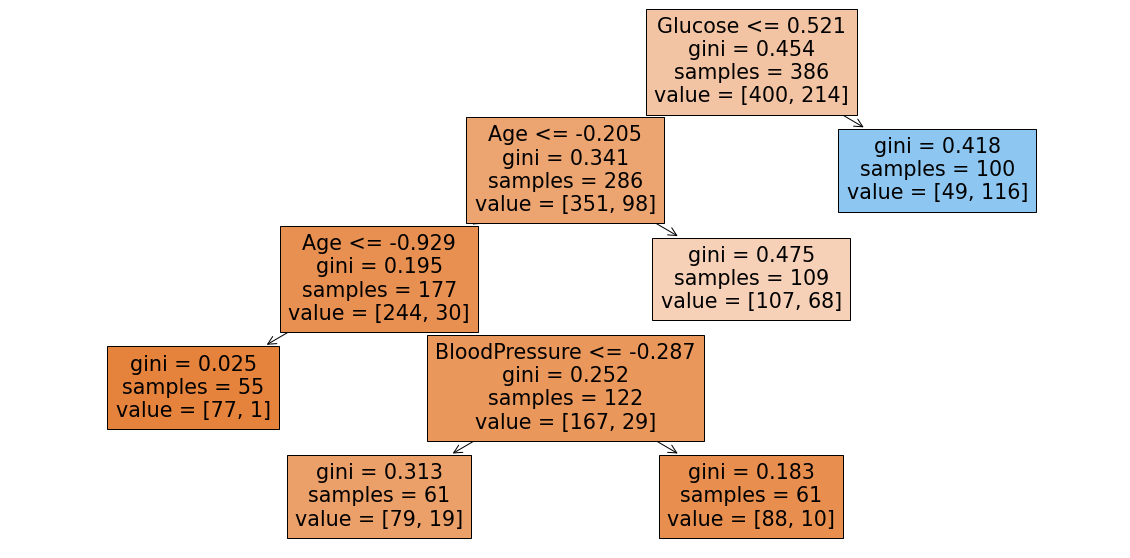

  7%|▋         | 7/100 [00:02<00:36,  2.52it/s]

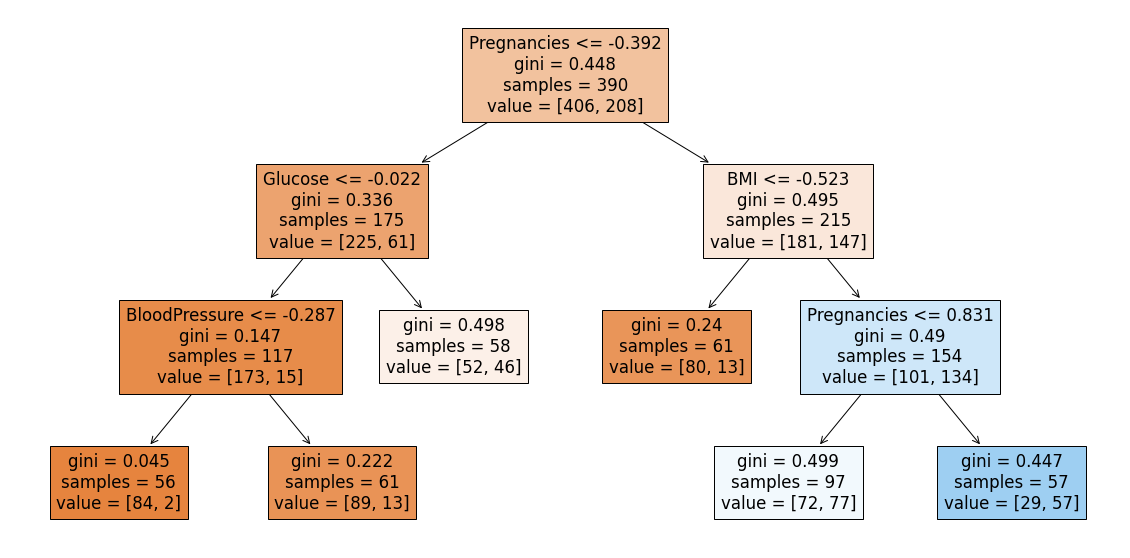

  8%|▊         | 8/100 [00:03<00:37,  2.43it/s]

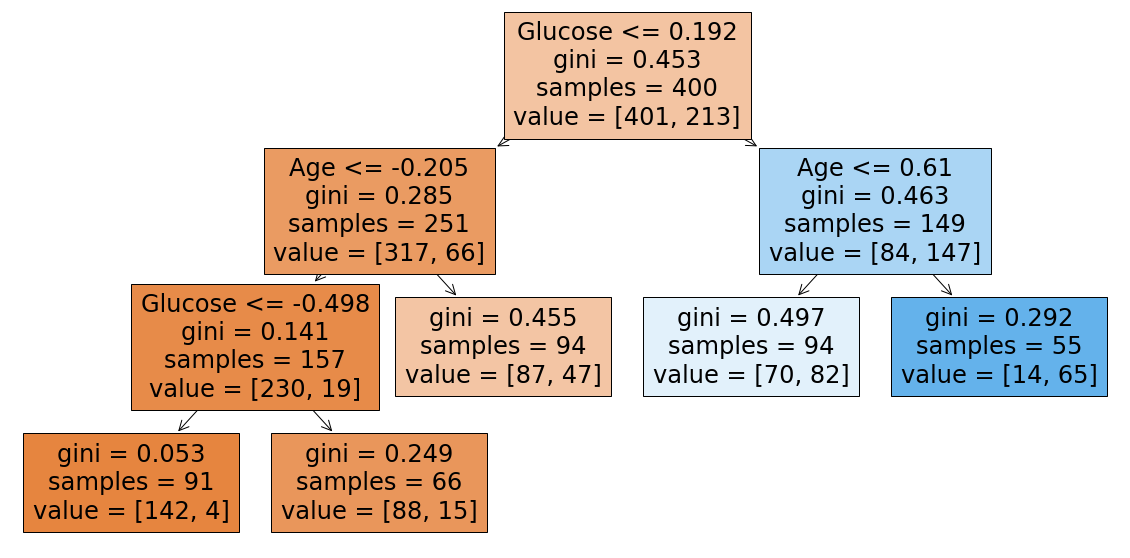

  9%|▉         | 9/100 [00:03<00:36,  2.46it/s]

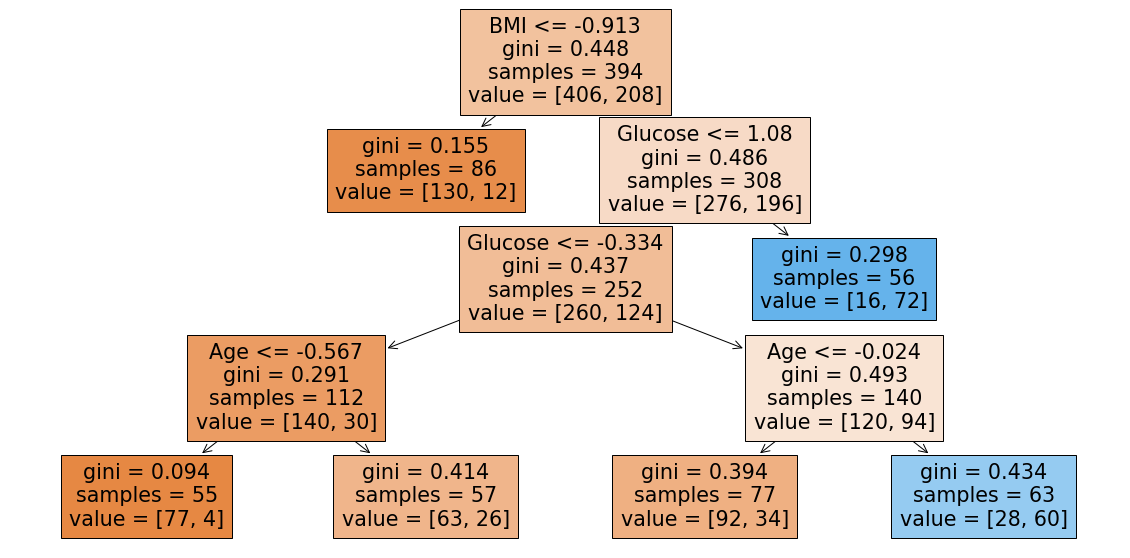

 10%|█         | 10/100 [00:04<00:37,  2.38it/s]

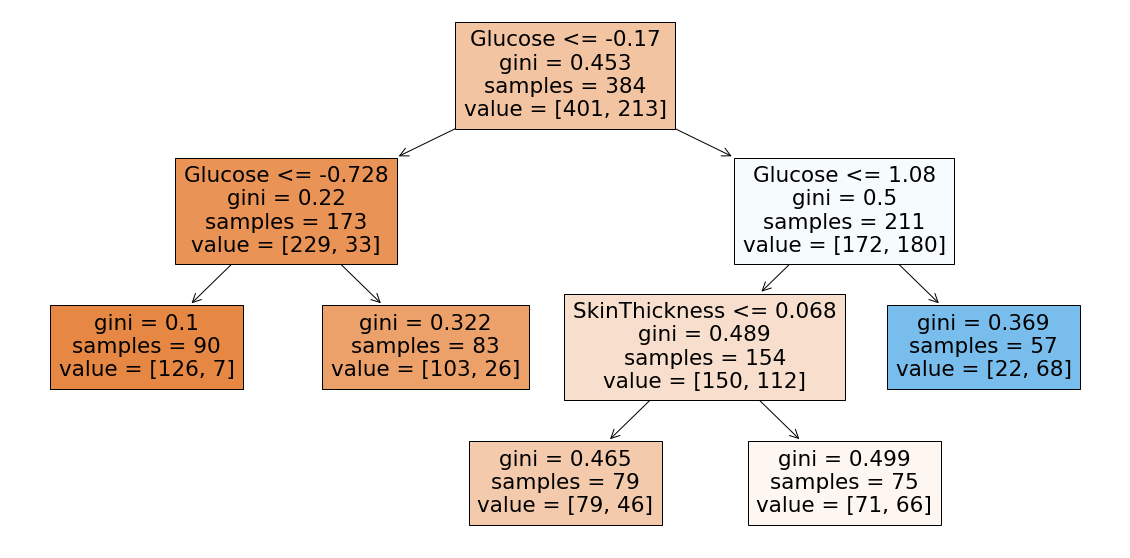

 11%|█         | 11/100 [00:04<00:36,  2.43it/s]

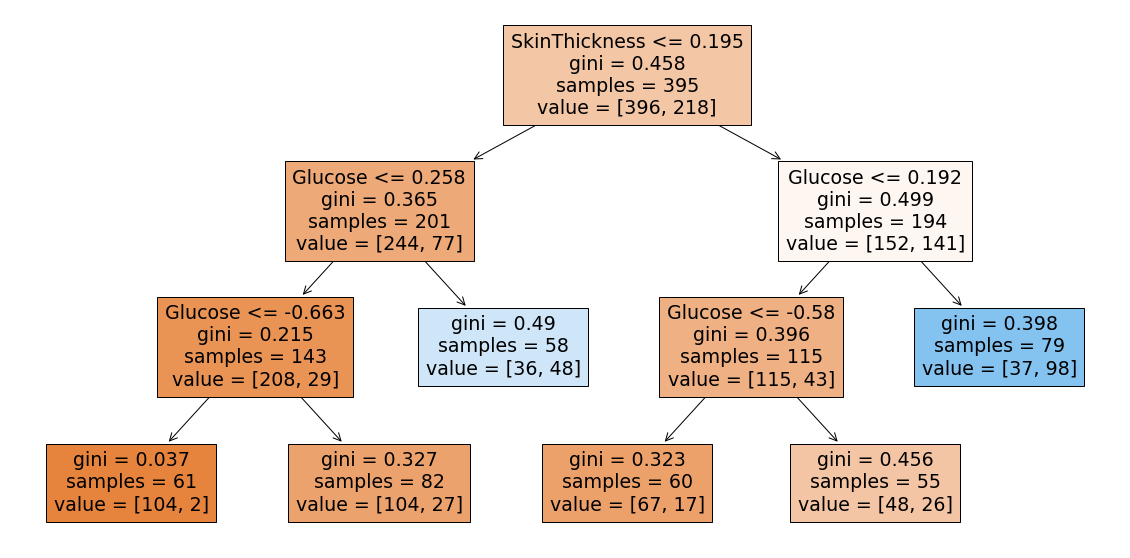

 12%|█▏        | 12/100 [00:04<00:37,  2.37it/s]

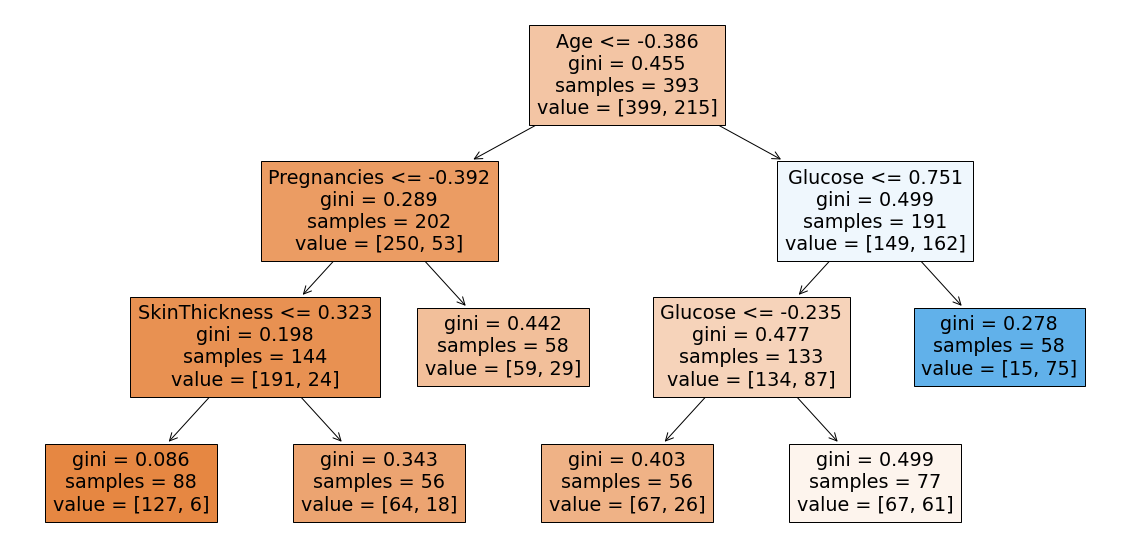

 13%|█▎        | 13/100 [00:05<00:37,  2.31it/s]

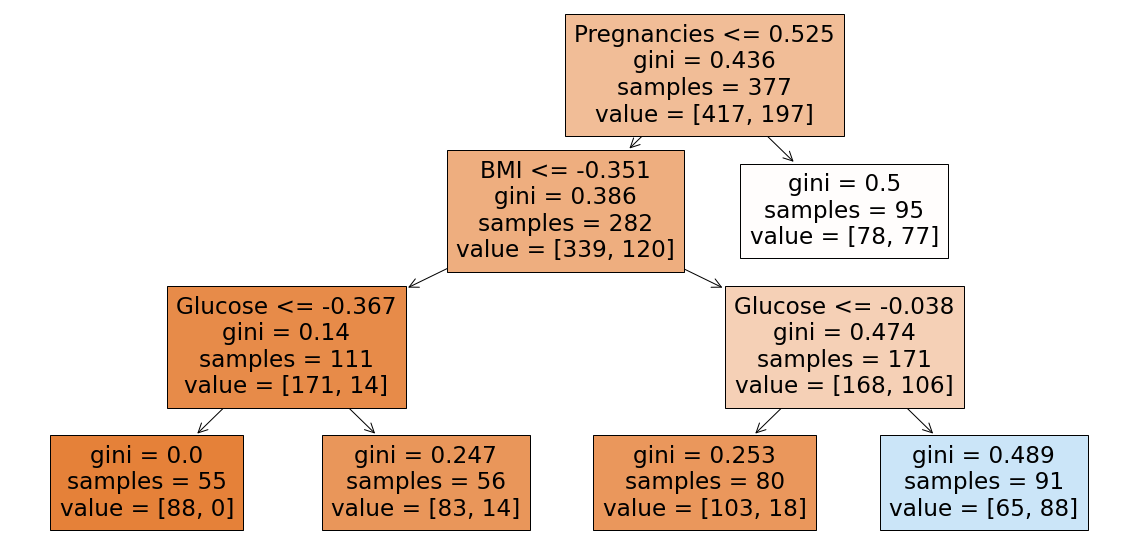

 14%|█▍        | 14/100 [00:05<00:35,  2.40it/s]

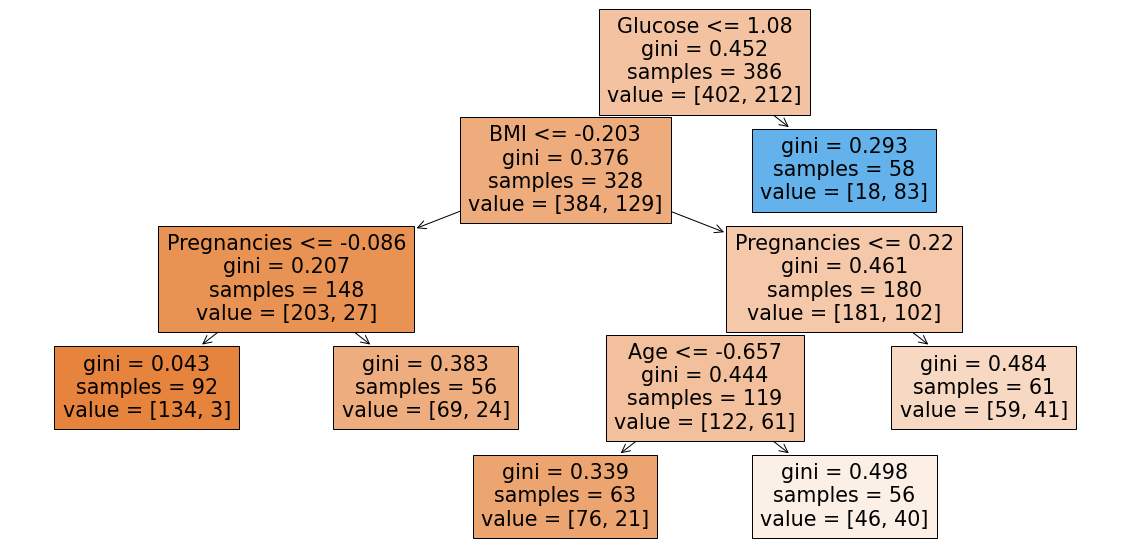

 15%|█▌        | 15/100 [00:06<00:36,  2.31it/s]

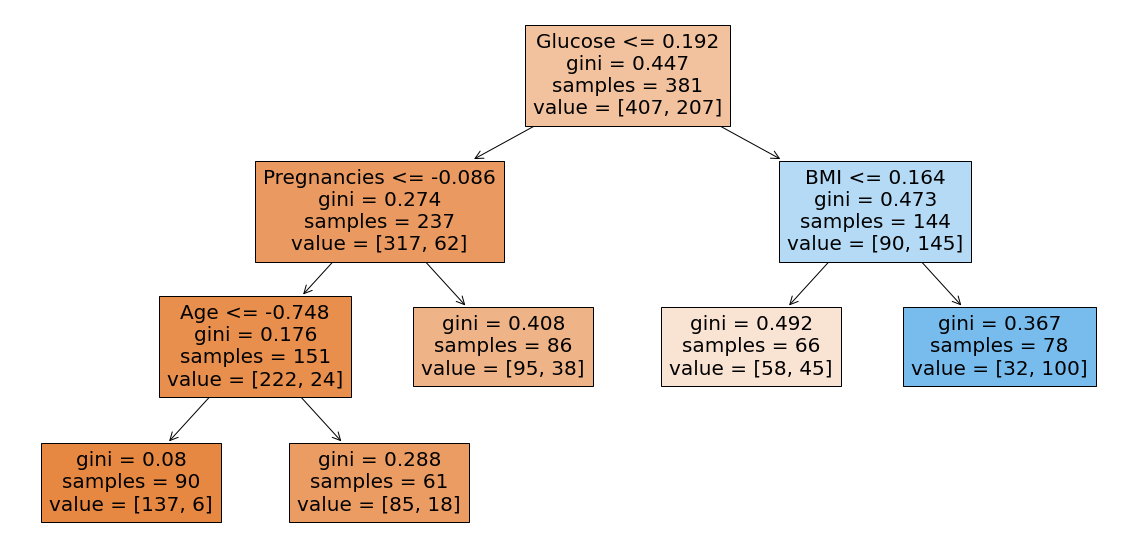

 16%|█▌        | 16/100 [00:06<00:36,  2.33it/s]

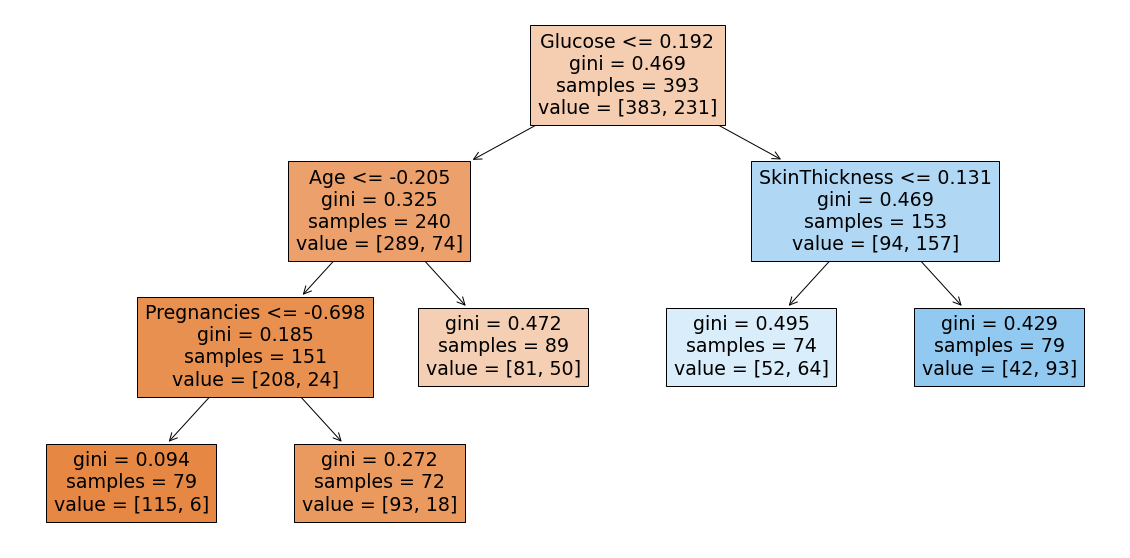

 17%|█▋        | 17/100 [00:07<00:34,  2.38it/s]

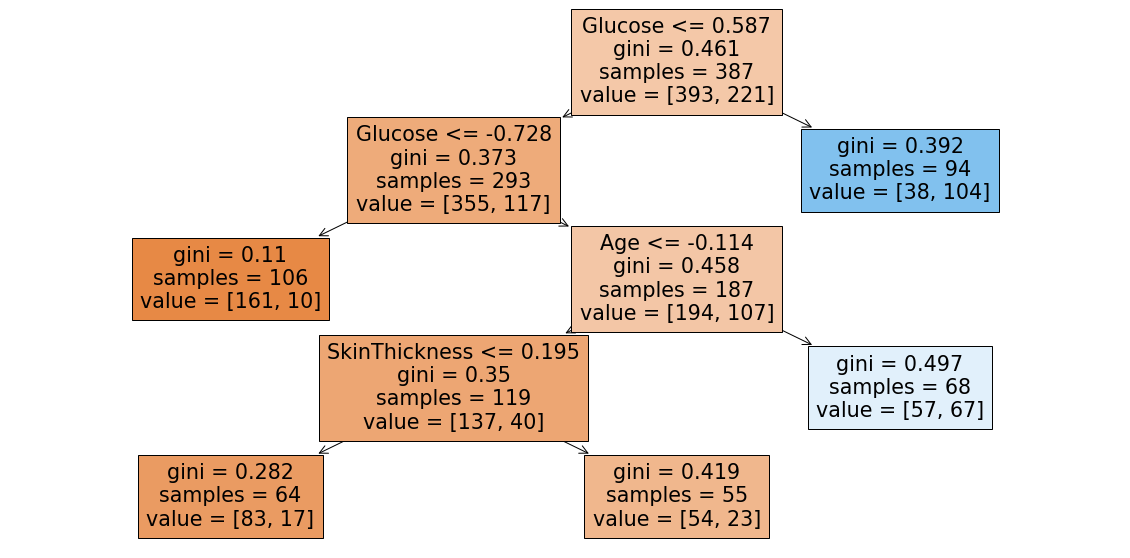

 18%|█▊        | 18/100 [00:07<00:38,  2.15it/s]

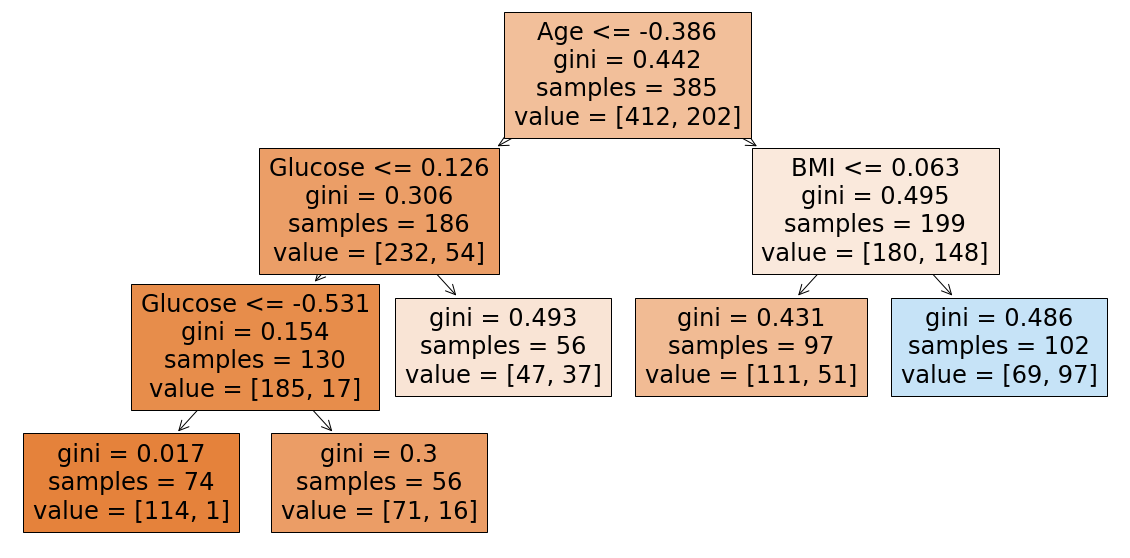

 19%|█▉        | 19/100 [00:07<00:36,  2.25it/s]

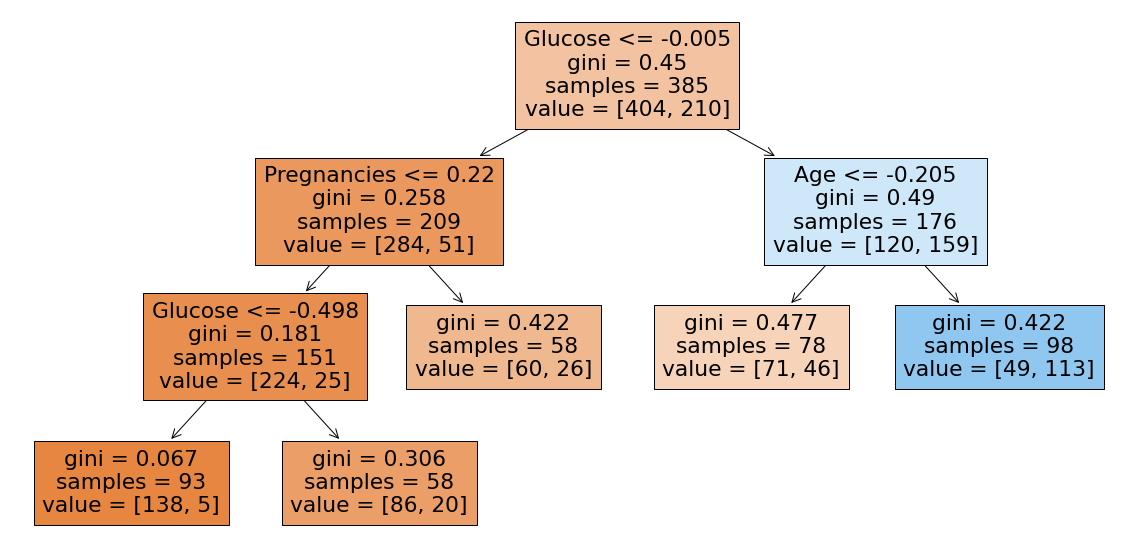

 20%|██        | 20/100 [00:08<00:34,  2.29it/s]

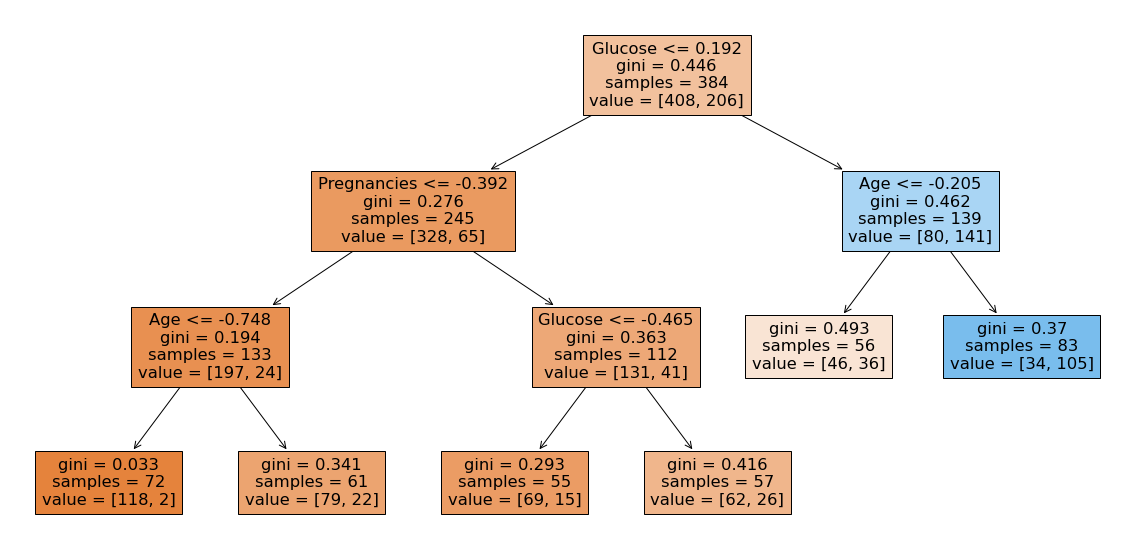

 21%|██        | 21/100 [00:09<00:34,  2.30it/s]


KeyboardInterrupt: ignored

In [57]:
# dibujamos los árboles de nuestro bosque       EJECUTAR AL FINAL!!!!!!!!!!!!!!!!!!!!!!!

for arbol in tqdm(bosque.estimators_):
    fig = plt.figure(figsize=(20, 10))
    tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    plt.show()

In [97]:
# calculamos las métricas para saber si nuestro modelo es bueno:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [98]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [67]:
# Intento 6 
# param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
                        #  'min_samples_leaf': [35, 55, 75],
                        #  'min_samples_split': [35, 55, 75]},

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

# dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
# dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.766234,0.711111,0.581818,0.640000,0.469474,test,Random Forest
1,0.783388,0.763158,0.544601,0.635616,0.487556,train,Random Forest


In [51]:
# Intento 5
# param_grid={'max_depth': [6, 7], 'max_features': [1, 2, 3],
                        #  'min_samples_leaf': [10, 30, 50],
                        #  'min_samples_split': [10, 30, 50]}, 

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

# dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
# dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.74026,0.636364,0.636364,0.636364,0.434343,test,Random Forest
1,0.84202,0.802083,0.723005,0.760494,0.643105,train,Random Forest


In [40]:
# Intento 4
# param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
                        #  'min_samples_leaf': [10, 30, 50],
                        #  'min_samples_split': [10, 30, 50]},

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

# dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
# dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.74026,0.636364,0.636364,0.636364,0.434343,test,Random Forest
1,0.84202,0.802083,0.723005,0.760494,0.643105,train,Random Forest


In [102]:
# Intento 3
# param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
                        #  'min_samples_leaf': [30, 50, 70],
                        #  'min_samples_split': [30, 50, 70]},

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

dt_results_3 = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest_3")
dt_results_3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.772727,0.70,0.636364,0.666667,0.494845,test,Random Forest_3
1,0.793160,0.75,0.605634,0.670130,0.521953,train,Random Forest_3


In [25]:
# Intento 2
# param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [20, 40, 60],
#                          'min_samples_split': [20, 40, 60]},

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

# dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
# dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746753,0.660000,0.600000,0.628571,0.437113,test,Random Forest
1,0.812704,0.788235,0.629108,0.699739,0.566123,train,Random Forest


In [92]:
# Intento 1
# param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3, 4],
                        #  'min_samples_leaf': [20, 40, 60],
                        #  'min_samples_split': [20, 40, 60]},

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

dt_results_1 = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest_1")
dt_results_1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.772727,0.692308,0.654545,0.672897,0.498978,test,Random Forest_1
1,0.811075,0.759358,0.666667,0.710000,0.570779,train,Random Forest_1


In [68]:
# Juntamos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora


df_LR_DT_results = pd.read_csv('/content/resultados_diabetes_5_LR_DT.csv', index_col = 0)
df_LR_DT_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta
4,0.668831,0.533333,0.581818,0.556522,0.293069,test,Decision tree Esta II
5,0.760586,0.663366,0.629108,0.645783,0.465163,train,Decision tree Esta II


In [106]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados = pd.concat([dt_results_1, dt_results_3, df_LR_DT_results], axis = 0)
df_todos_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.772727,0.692308,0.654545,0.672897,0.498978,test,Random Forest_1
1,0.811075,0.759358,0.666667,0.710000,0.570779,train,Random Forest_1
0,0.772727,0.700000,0.636364,0.666667,0.494845,test,Random Forest_3
1,0.793160,0.750000,0.605634,0.670130,0.521953,train,Random Forest_3
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta
4,0.668831,0.533333,0.581818,0.556522,0.293069,test,Decision tree Esta II
5,0.760586,0.663366,0.629108,0.645783,0.465163,train,Decision tree Esta II


In [108]:
df_todos_resultados.to_csv('resultados_diabetes_6_LR_RF.csv')

Conclusion: Entre todos los modelos realizados, no obtuvimos un valor de kappa aceptable (0.6), no obstante hemos seleccionado estos cuatro por seren los que presentan mejor valor de kappa y menor distancia entre las métricas resultantes de test y train.

Entendemos que de todos ellos, los mejores resultados son de los modelos Random Forest 1 y 3.

In [104]:
# Chequeamos la importancia de las variables con feature_importance_
# Creamos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,Glucose,0.494781
6,Age,0.218913
5,BMI,0.185671
0,Pregnancies,0.032281
3,SkinThickness,0.025853
4,Insulin,0.023557
2,BloodPressure,0.018944


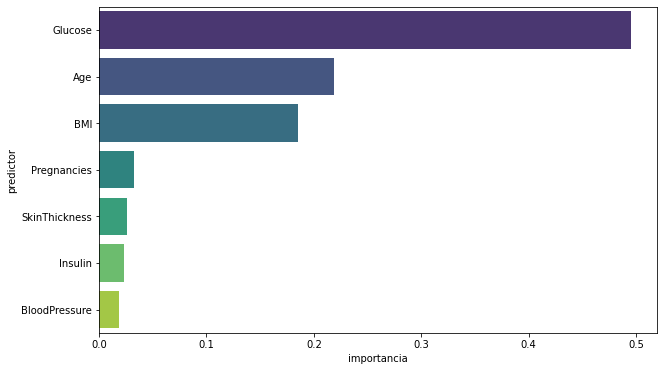

In [107]:
# Ploteamos los resultados:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()